<h1>Predicting NBA Games: An Analysis of Different Models and Sportbooks</h1>
<h2>By: Sam Kushnir and Jonah Berman</h2>

<h2>Introduction</h2>

As avid NBA fans, we are constantly looking towards future NBA games and asking a very simply question: Who will win? My accuracy in answering this question, to be honest, is a little embarrising. I have an inconsistent, biased model in my brain that takes into account my friends' opinions, the media, betting odds, and so many more unconsious factors that I don't even know I'm considering. But maybe there is a better way. Maybe there is a way to take a defined list of inputs, and some function, and output a much more accurate prediction which answers this simple question. 

Going one step further, it would be cool to also predict by how many points a team will win or lose by. In sports betting terms, this is often referred to as the spread. But these two questions are really it. All we are interested in for our model outputs are two questions: who will win and by how much?

My goal for this project is two-fold:
1. To explore a sea of possible models, and gain insight into making the most accurate model that I can to answer these two questions. 
2. Explore public bias, and on what subsets of games there is public bias which makes our models better than what the public thinks. This is really the motivation piece of it. The ability is gain an edge in predicting the future over the public and find out where the public is wrong is extremely valuable.

If you are interested in these questions, there are, luckily, many other people who have researched this topic and have produced great insight into it. On the top of that list in none other than Nate Silver and the folks at 538, who produce great insight into NBA stats and predictions. Here are a few of their articles I found really interesting:
1. https://projects.fivethirtyeight.com/complete-history-of-the-nba/#bucks
2. https://fivethirtyeight.com/features/how-the-warriors-are-wrecking-the-rest-of-the-nba-and-our-forecast-model/

As well their prediction engine: https://projects.fivethirtyeight.com/2022-nba-predictions/games/.

<h2> Data Collection Process: Part 1</h2>

Below we will be the outline and code of the first part of our data collection process. Later, we will have a second portion of data collection and processing to look at sportsbook data and incorperate new models which need different kinds of data which we will get to later.

The dataset I was looking for at this point in the project was game by game data. I wanted each row to represent a unique game and I wanted a collection of different statistics about each game. I first went on Kaggle to search for data and found the following dataset: https://www.kaggle.com/datasets/nathanlauga/nba-games. The creator of this dataset convienently combined a number of different datasets into one large dataset and posted it on github: https://github.com/Nathanlauga/nba-data-scrapping/blob/master/notebooks/games_formated_07_20.csv.

But first, just some generic imports:

In [1]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model as lm
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
import sklearn.model_selection as ms
import sklearn.metrics as met
from sklearn.ensemble import RandomForestClassifier
import statistics
import scipy.stats as st
from collections import defaultdict
import math
from datetime import datetime as dt

In [2]:
# Reading in the CSV File:
gameData = pd.read_csv("./data/games_formated_07_20.csv")

In [3]:
# Displaying the data:
gameData.head()

,GAME_ID,G_home,W_PCT_home,HOME_RECORD_home,ROAD_RECORD_home,W_PCT_prev_home,HOME_RECORD_prev_home,ROAD_RECORD_prev_home,G_away,W_PCT_away,...,REB_home_10g,WIN_PRCT_away_10g,PTS_away_10g,FG_PCT_away_10g,FT_PCT_away_10g,FG3_PCT_away_10g,AST_away_10g,REB_away_10g,SEASON,HOME_TEAM_WINS
0,10700001,82,0.293,0.292683,0.292683,0.402,0.512195,0.292683,82,0.573,...,37.5,0.4,94.2,0.4471,0.7917,0.3460,19.3,38.4,2007,1
1,10700005,82,0.488,0.609756,0.365854,0.439,0.634146,0.243902,82,0.366,...,41.7,0.3,96.8,0.4723,0.7376,0.2604,21.3,42.1,2007,0
2,10700006,82,0.646,0.634146,0.658537,0.780,0.902439,0.658537,82,0.537,...,39.1,0.2,88.2,0.4612,0.6901,0.3780,18.1,35.0,2007,1
3,10700007,82,0.610,0.731707,0.487805,0.610,0.756098,0.463415,82,0.500,...,41.2,0.2,89.3,0.4112,0.6934,0.3144,18.4,38.5,2007,0
4,10700008,82,0.341,0.439024,0.243902,0.488,0.609756,0.365854,82,0.598,...,36.7,0.6,92.4,0.4300,0.7320,0.3553,20.6,41.9,2007,1


In [4]:
gameData.columns

Index(['GAME_ID', 'G_home', 'W_PCT_home', 'HOME_RECORD_home',
       'ROAD_RECORD_home', 'W_PCT_prev_home', 'HOME_RECORD_prev_home',
       'ROAD_RECORD_prev_home', 'G_away', 'W_PCT_away', 'HOME_RECORD_away',
       'ROAD_RECORD_away', 'W_PCT_prev_away', 'HOME_RECORD_prev_away',
       'ROAD_RECORD_prev_away', 'WIN_PRCT_home_3g', 'PTS_home_3g',
       'FG_PCT_home_3g', 'FT_PCT_home_3g', 'FG3_PCT_home_3g', 'AST_home_3g',
       'REB_home_3g', 'WIN_PRCT_away_3g', 'PTS_away_3g', 'FG_PCT_away_3g',
       'FT_PCT_away_3g', 'FG3_PCT_away_3g', 'AST_away_3g', 'REB_away_3g',
       'WIN_PRCT_home_10g', 'PTS_home_10g', 'FG_PCT_home_10g',
       'FT_PCT_home_10g', 'FG3_PCT_home_10g', 'AST_home_10g', 'REB_home_10g',
       'WIN_PRCT_away_10g', 'PTS_away_10g', 'FG_PCT_away_10g',
       'FT_PCT_away_10g', 'FG3_PCT_away_10g', 'AST_away_10g', 'REB_away_10g',
       'SEASON', 'HOME_TEAM_WINS'],
      dtype='object')

As you can see, the data I have here is precisely what I was looking for, with each row corresponding to a unique game. Now, let's dive into some of the important columns. GAME_ID is simply a way to uniquely identity every game. W_PCT_home is the win percentage of the home team up until this game for the current season. HOME_RECORD_home and ROAD_RECORD_home are the home team's win percentage at home and away, respectively for the current season. Then, the way that this dataset distinguishes between the home team and the away team is simply having the same names but replacing home with away, so for example the column for the away win percentage is the column named "W_PCT_away". There are a few more interesting columns that I want to point out. One interesting one is the FG3_PCT_home_3g vs. the FG3_PCT_away_3g columns. This column represents the 3 point percentage from the team's last 3 games. Additionally, there are equivelent columns that take into account the last 10 games. These columns will be good for determining if a certain team is currently on a "hot streak" or potentially a "cold streak." The last important column that I want to point out is the HOME_TEAM_WINS column. This column will act as our labeling for our data as that is what we want to predict right now. 

<h2>The First Step: Using Off-the-Shelf Classifier and Regression Models to Predict NBA Games</h2><br>
The main attribute gameData is missing is the actual score of the game. While it does track the winner of the game in the column HOME_TEAM_WINS, in order to make a regression on the score differential of the game, we need more data. We get this data from score.csv, which includes team performance stats for both the home and away teams, the same GAME_ID specified in games_formated_07_20.csv, and, most importantly, the score of the game. We will utilize this dataset to obtain data on the score differential of individual games and create a regression model that attempts to predict this outcome.

In [5]:
# reading the csv files and displaying 
score = pd.read_csv('./data/games.csv')
score.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

In [6]:
# make a column for score differential = home_team_points - away_team_points
score['SCORE_DIFF'] = score['PTS_home']-score['PTS_away']
# merging the new score differential column into the gameData dataset by the unique gameID
gameData = gameData.merge(score[['GAME_ID', 'SCORE_DIFF','GAME_DATE_EST', 'TEAM_ID_home',
                                 'TEAM_ID_away']], on = 'GAME_ID', how = 'left')
gameData[['GAME_ID','GAME_DATE_EST', 'TEAM_ID_home','TEAM_ID_away','W_PCT_home',
          'W_PCT_away','HOME_TEAM_WINS','SCORE_DIFF']].sample(5)

,GAME_ID,GAME_DATE_EST,TEAM_ID_home,TEAM_ID_away,W_PCT_home,W_PCT_away,HOME_TEAM_WINS,SCORE_DIFF
12127,21600041,2016-10-30,1610612745,1610612742,0.500,0.512,1,1.0
14805,21800259,2018-11-21,1610612749,1610612757,0.750,0.706,1,43.0
13467,21700151,2017-11-07,1610612764,1610612742,0.598,0.091,0,-14.0
15815,21900039,2019-10-27,1610612750,1610612748,0.439,0.476,1,7.0
9263,21300867,2014-02-28,1610612739,1610612762,0.390,0.368,1,20.0


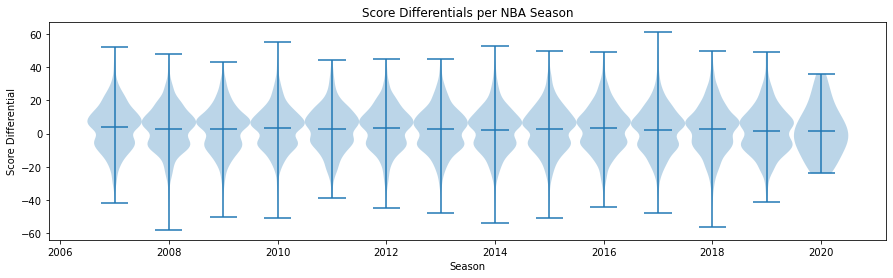

In [7]:
seasons = gameData['SEASON'].unique()
score_diff_per_year = [gameData[gameData.SEASON == y]['SCORE_DIFF'] for y in seasons]
fig, ax = plt.subplots()
ax.violinplot(score_diff_per_year,seasons
              ,widths=1,showmeans=True)
ax.set_xlabel('Season')
ax.set_ylabel('Score Differential')
ax.set_title('Score Differentials per NBA Season')
fig.set_figwidth(15)
plt.show()


As you can see above, not only do we have who won the game, but also by how much. Score differential is expressed in the perspective of the home team, meaning that whenever HOME_TEAM_WINS == 1, SCORE_DIFF > 0 and whenever HOME_TEAM_WINS == 0, SCORE_DIFF < 0.<br><br>
The next thing we realized by looking at some of the dates of the games is that some of the games listed are preseason games. Although it may be interesting to analyze the difference between preseason and regular season games, for the purpose of projecting scores for games, looking at games that do not matter to the team may bias the data. Sometimes rosters are not complete, star players do not play a lot of minutes, and a lot of other variables that do not need to be considered in regular season games. Therefore, using the ELO data (you will see later), which only has regular season and playoff games, we will merge out all the preseason games. The only downside is the ELO data only has games up to the 2015 season, so we would be losing 5 seasons worth of data********. <br><br>
Even though the two datasets GAME_IDs do not match up, there is another way to accomplish this goal. Since a team can only play one game a day, a unique identifier can be a combination of date and home team. We will use the teams.csv dataset below to accomplish this goal.

In [8]:
# reading the csvs
teams = pd.read_csv('./data/teams.csv')
EloData = pd.read_csv("./data/nbaallelo.csv")
EloData = EloData[EloData["_iscopy"]==0]

In [9]:
# checking to see if there are any discrepencies between the nicknames of teams 
# between the two datasets
EloData_teams = EloData['fran_id'].unique()
gameData_teams = teams['NICKNAME'].unique()
elo_teams_in_gameData = [value for value in EloData_teams if value in gameData_teams]
list(set(gameData_teams) - set(elo_teams_in_gameData))

['76ers', 'Trail Blazers']

In [10]:
# trying to find the alternative spelling for the team name
EloData_teams

array(['Huskies', 'Stags', 'Falcons', 'Steamrollers', 'Bombers', 'Rebels',
       'Ironmen', 'Celtics', 'Warriors', 'Knicks', 'Capitols',
       'Baltimore', 'Jets', 'Pistons', 'Kings', 'Lakers', 'Hawks',
       'Olympians', 'Waterloo', 'Packers', 'Redskins', 'Sixers', 'Denver',
       'Wizards', 'Bulls', 'Squires', 'Rockets', 'Pacers', 'Nuggets',
       'Spurs', 'Sounds', 'Thunder', 'Colonels', 'Floridians', 'Spirits',
       'Nets', 'Condors', 'Stars', 'Bucks', 'Suns', 'Clippers',
       'Trailblazers', 'Cavaliers', 'Sails', 'Jazz', 'Mavericks',
       'Pelicans', 'Heat', 'Magic', 'Timberwolves', 'Raptors',
       'Grizzlies', 'Hornets'], dtype=object)

In [11]:
# creating a dictionary matching TEAM_ID to the NICKNAME
id_nickname_dict = {}
for index, row in teams.iterrows():
    id_nickname_dict[row['TEAM_ID']] = row['NICKNAME']
# fixing the two discrepencies
id_nickname_dict[1610612755] = 'Sixers'
id_nickname_dict[1610612757] = 'Trailblazers'

# creating a column that gives us the home team's nickname
nicknames = []
for index, row in gameData.iterrows():
    nicknames.append(id_nickname_dict[row['TEAM_ID_home']])
gameData['NICKNAME_home'] = nicknames
gameData.head()

,GAME_ID,G_home,W_PCT_home,HOME_RECORD_home,ROAD_RECORD_home,W_PCT_prev_home,HOME_RECORD_prev_home,ROAD_RECORD_prev_home,G_away,W_PCT_away,...,FG3_PCT_away_10g,AST_away_10g,REB_away_10g,SEASON,HOME_TEAM_WINS,SCORE_DIFF,GAME_DATE_EST,TEAM_ID_home,TEAM_ID_away,NICKNAME_home
0,10700001,82,0.293,0.292683,0.292683,0.402,0.512195,0.292683,82,0.573,...,0.3460,19.3,38.4,2007,1,4.0,2007-10-06,1610612738,1610612761,Celtics
1,10700005,82,0.488,0.609756,0.365854,0.439,0.634146,0.243902,82,0.366,...,0.2604,21.3,42.1,2007,0,-1.0,2007-10-08,1610612753,1610612737,Magic
2,10700006,82,0.646,0.634146,0.658537,0.780,0.902439,0.658537,82,0.537,...,0.3780,18.1,35.0,2007,1,17.0,2007-10-08,1610612765,1610612748,Pistons
3,10700007,82,0.610,0.731707,0.487805,0.610,0.756098,0.463415,82,0.500,...,0.3144,18.4,38.5,2007,0,-19.0,2007-10-09,1610612739,1610612764,Cavaliers
4,10700008,82,0.341,0.439024,0.243902,0.488,0.609756,0.365854,82,0.598,...,0.3553,20.6,41.9,2007,1,5.0,2007-10-09,1610612749,1610612741,Bucks


In [12]:
# making the columns datetime objects
EloData.date_game = pd.to_datetime(EloData.date_game)
gameData.GAME_DATE_EST = pd.to_datetime(gameData.GAME_DATE_EST)

#merging the datasets 
gameData= pd.merge(gameData, EloData[['game_id', 'date_game', 'fran_id', 'year_id']],  how='left', 
                   left_on=['GAME_DATE_EST', 'NICKNAME_home'],
                   right_on = ['date_game', 'fran_id'])
gameData[['GAME_DATE_EST', 'date_game','NICKNAME_home', 'fran_id']
        ].sort_values('GAME_DATE_EST')
gameData.sample(5)

,GAME_ID,G_home,W_PCT_home,HOME_RECORD_home,ROAD_RECORD_home,W_PCT_prev_home,HOME_RECORD_prev_home,ROAD_RECORD_prev_home,G_away,W_PCT_away,...,HOME_TEAM_WINS,SCORE_DIFF,GAME_DATE_EST,TEAM_ID_home,TEAM_ID_away,NICKNAME_home,game_id,date_game,fran_id,year_id
1117,11900013,82,0.500,0.634146,0.365854,0.476,0.609756,0.341463,82,0.512,...,0,-24.0,2019-10-07,1610612765,1610612753,Pistons,NaN,NaT,NaN,NaN
3255,20800768,50,0.340,0.333333,0.346154,0.268,0.365854,0.170732,53,0.358,...,0,-8.0,2009-02-10,1610612750,1610612761,Timberwolves,200902100MIN,2009-02-10,Timberwolves,2009.0
5250,21000303,20,0.750,0.818182,0.666667,0.720,0.829268,0.609756,21,0.619,...,0,-6.0,2010-12-06,1610612753,1610612737,Magic,201012060ORL,2010-12-06,Magic,2011.0
14784,21800238,14,0.500,0.714286,0.285714,0.573,0.804878,0.341463,17,0.706,...,1,12.0,2018-11-18,1610612759,1610612744,Spurs,NaN,NaT,NaN,NaN
1927,20700670,44,0.182,0.300000,0.083333,0.390,0.487805,0.292683,44,0.409,...,1,16.0,2008-01-30,1610612750,1610612741,Timberwolves,200801300MIN,2008-01-30,Timberwolves,2008.0


In [13]:
gameData.GAME_DATE_EST.sort_values()

0      2007-10-06
1      2007-10-08
2      2007-10-08
3      2007-10-09
4      2007-10-09
          ...    
1254   2020-12-18
1247   2020-12-18
1255   2020-12-19
1256   2020-12-19
1257   2020-12-19
Name: GAME_DATE_EST, Length: 17922, dtype: datetime64[ns]

In [14]:
# getting rid of all the preseason games 
gameData = gameData[gameData['date_game']==gameData['date_game']]
gameData.sample(5)

,GAME_ID,G_home,W_PCT_home,HOME_RECORD_home,ROAD_RECORD_home,W_PCT_prev_home,HOME_RECORD_prev_home,ROAD_RECORD_prev_home,G_away,W_PCT_away,...,HOME_TEAM_WINS,SCORE_DIFF,GAME_DATE_EST,TEAM_ID_home,TEAM_ID_away,NICKNAME_home,game_id,date_game,fran_id,year_id
9563,21301167,77,0.584,0.631579,0.538462,0.683,0.780488,0.585366,77,0.688,...,1,5.0,2014-04-09,1610612763,1610612748,Grizzlies,201404090MEM,2014-04-09,Grizzlies,2014.0
1810,20700553,36,0.250,0.294118,0.210526,0.378,0.487805,0.268293,36,0.694,...,0,-2.0,2008-01-14,1610612760,1610612747,Thunder,200801140SEA,2008-01-14,Thunder,2008.0
1805,20700548,35,0.857,0.888889,0.823529,0.293,0.292683,0.292683,35,0.543,...,0,-5.0,2008-01-14,1610612738,1610612764,Celtics,200801140BOS,2008-01-14,Celtics,2008.0
8149,21200982,66,0.758,0.870968,0.657143,0.758,0.848485,0.666667,65,0.338,...,1,6.0,2013-03-16,1610612759,1610612739,Spurs,201303160SAS,2013-03-16,Spurs,2013.0
16989,40800235,82,0.659,0.804878,0.512195,0.610,0.804878,0.414634,82,0.610,...,1,14.0,2009-05-13,1610612743,1610612742,Nuggets,200905130DEN,2009-05-13,Nuggets,2009.0


In [15]:
# checking to see if each season has a reasonable number of games
# by counting the number of games per season
gameData.groupby('year_id').size()

year_id
2008.0    1315
2009.0    1315
2010.0    1312
2011.0    1310
2012.0    1074
2013.0    1313
2014.0    1319
2015.0    1311
dtype: int64

As you can see above, each season has roughly the same number of games except the 2012 season. This is because the NBA had a lockout in 2012 and missed the first 16 games of the regular season. 16 games, times 30 teams, divided by 2 teams per game, equals 240 which makes up the difference for the normal amount of games.
<br>
<h2>Making the Models</h2>
Now we can start to create the models that predict the outcomes of the games. The next step is to find the attributes in the data set with the highest correaltion with our dependant variables (HOME_TEAM_WINS and SCORE_DIFF). 

In [16]:
# independant variables
feat_cols = [
    'G_home', 'W_PCT_home', 'HOME_RECORD_home',
    'ROAD_RECORD_home', 'W_PCT_prev_home', 'HOME_RECORD_prev_home',
    'ROAD_RECORD_prev_home', 'G_away', 'W_PCT_away', 'HOME_RECORD_away',
    'ROAD_RECORD_away', 'W_PCT_prev_away', 'HOME_RECORD_prev_away',
    'ROAD_RECORD_prev_away', 'WIN_PRCT_home_3g', 'PTS_home_3g',
    'FG_PCT_home_3g', 'FT_PCT_home_3g', 'FG3_PCT_home_3g', 'AST_home_3g',
    'REB_home_3g', 'WIN_PRCT_away_3g', 'PTS_away_3g', 'FG_PCT_away_3g',
    'FT_PCT_away_3g', 'FG3_PCT_away_3g', 'AST_away_3g', 'REB_away_3g',
    'WIN_PRCT_home_10g', 'PTS_home_10g', 'FG_PCT_home_10g',
    'FT_PCT_home_10g', 'FG3_PCT_home_10g', 'AST_home_10g', 'REB_home_10g',
    'WIN_PRCT_away_10g', 'PTS_away_10g', 'FG_PCT_away_10g',
    'FT_PCT_away_10g', 'FG3_PCT_away_10g', 'AST_away_10g', 'REB_away_10g'
]
# dependant variables
home_team_wins = 'HOME_TEAM_WINS'
score_diff = 'SCORE_DIFF'

In [17]:
# finding the correaltion of every attribute to home team winning
winner_corr = gameData[feat_cols + [home_team_wins]].corr()['HOME_TEAM_WINS']
winner_corr.sort_values()

W_PCT_away              -0.238645
HOME_RECORD_away        -0.215029
ROAD_RECORD_away        -0.214014
WIN_PRCT_away_10g       -0.202055
W_PCT_prev_away         -0.166716
ROAD_RECORD_prev_away   -0.162513
WIN_PRCT_away_3g        -0.151756
HOME_RECORD_prev_away   -0.151444
FG_PCT_away_10g         -0.127184
FG_PCT_away_3g          -0.119540
PTS_away_10g            -0.086738
PTS_away_3g             -0.084165
AST_away_10g            -0.080602
AST_away_3g             -0.075255
FG3_PCT_away_10g        -0.070052
FG3_PCT_away_3g         -0.042217
REB_away_10g            -0.032485
REB_away_3g             -0.018154
FT_PCT_away_3g          -0.017587
FT_PCT_away_10g         -0.016079
G_home                   0.019751
G_away                   0.024982
REB_home_3g              0.030234
FT_PCT_home_3g           0.039231
FT_PCT_home_10g          0.041921
REB_home_10g             0.044327
FG3_PCT_home_3g          0.051681
AST_home_3g              0.072402
FG3_PCT_home_10g         0.090930
AST_home_10g  

In [18]:
# finding the correaltion of every attribute to the score differential
score_diff_corr = gameData[feat_cols + [score_diff]].corr()['SCORE_DIFF']
score_diff_corr.sort_values()

W_PCT_away              -0.265504
HOME_RECORD_away        -0.242639
ROAD_RECORD_away        -0.235535
WIN_PRCT_away_10g       -0.227209
W_PCT_prev_away         -0.176691
ROAD_RECORD_prev_away   -0.173556
WIN_PRCT_away_3g        -0.169690
HOME_RECORD_prev_away   -0.159364
FG_PCT_away_10g         -0.137636
FG_PCT_away_3g          -0.123892
PTS_away_10g            -0.105683
AST_away_10g            -0.102544
PTS_away_3g             -0.093807
AST_away_3g             -0.089261
FG3_PCT_away_10g        -0.086644
FG3_PCT_away_3g         -0.060537
REB_away_10g            -0.043922
REB_away_3g             -0.029435
FT_PCT_away_10g         -0.021351
FT_PCT_away_3g          -0.015675
G_home                   0.014943
G_away                   0.016555
FT_PCT_home_3g           0.027986
REB_home_3g              0.039422
FT_PCT_home_10g          0.047842
REB_home_10g             0.054293
FG3_PCT_home_3g          0.058630
AST_home_3g              0.079003
AST_home_10g             0.101182
FG3_PCT_home_1

Looking above at both the SCORE_DIFF and HOME_TEAM_WINS correlations, you can see a pattern. Attributes that describe the home team, such as W_PCT_home, tend be positive and attributes  that describe the away team, such as W_PCT_away, tend to be negative. This is because both dependant variables are in the perspective of the home team, meaning that the better the home team is, the higher we should exepct the SCORE_DIFF to be and the more likely they should win (HOME_TEAM_WINS == 1). The better the away team is, the more likley we see them chip away at the score differential and become more likley to win (HOME_TEAM_WINS == 0). In the end, we decided to take all the attributes with a correaltion greater than 0.1 or less than -0.1 to be considered in our models.

In [19]:
# picking the features that have a |correlation| > .15 for the model 
# that predicts the winner
winner_feat_cols = winner_corr[winner_corr.abs() > 0.15].index
winner_feat_cols = [c for c in winner_feat_cols if c != home_team_wins]
# picking the features that have a |correlation| > .1 for the model 
# that predicts the the point differential of the game
diff_feat_cols = score_diff_corr[score_diff_corr.abs() > 0.15].index
diff_feat_cols = [c for c in diff_feat_cols if c != score_diff]

Now, it is time to create our models. We will start with the classifier model to predict the winner of the game. Below is a function that takes in a dataset, independant and dependant variables, and a type of classifier model, and creates a model that fits to a random subset of the data. Afterwards, it outputs performance measures that show the effectiveness of the model on the unused subset of data. The three performance measures on the test data we chose are:<br>
<br>Accuracy: the percentage of correct predictions.
<br>Precision: the percentage of positive predictions (HOME_TEAM_WINS == 1) that were correct.
<br>Recall: the percentage of actual positives that you predicted correctly. <br><br>
Using these performance measures, we are able to accurately assess the effectiveness of different types of classification methods. 

In [20]:
# function that takes a dataset, list of features, dependant variable, 
# and choice of classifier, and outputs perforamnce measures of that classifier on the data
def classifier(games, X, y, classifier):
    # take an average over n tests of all performance measures
    n = 10
    accuracy = []
    precision = []
    recall = []
    

    for i in range(n):    
        # splitting the dataset into train and test sets
        ind_train, ind_test, dep_train, dep_test = ms.train_test_split(
            games[X], games[y])
        actual = np.array(dep_test)

        #fitting the classifier to the training set set
        classifier.fit(ind_train, dep_train)   
        #predicting the test set based on the classifier
        predicted = classifier.predict(ind_test)

        # comparing the predicted results to the actual
        false_pos = 0
        false_neg = 0
        correct_1 = 0
        correct_0 = 0     
        for i in range(len(actual)):
            if predicted[i] == actual[i]:
                if predicted[i] == 1:
                    correct_1+=1
                else:
                    correct_0+=1
            elif predicted[i] == 1:
                false_pos+=1
            else:
                false_neg+=1
                
        # storing the performace measures of each iteration
        accuracy.append((correct_0+correct_1)/len(actual))
        precision.append(correct_1/(correct_1+false_pos))
        recall.append(correct_1/(correct_1+false_neg))

    print('Accuracy: '+str(int(100*statistics.mean(accuracy)))+'%')
    print('Precision: '+str(int(100*statistics.mean(precision)))+'%')
    print('Recall: '+str(int(100*statistics.mean(recall)))+'%')

In [21]:
print('Results for predicting the correct winner:\n')
print('Decision Tree Results: ')
classifier(gameData, winner_feat_cols, home_team_wins, DecisionTreeClassifier())
print('\nK-Nearest Neighbors Classifier Results: ')
classifier(gameData, winner_feat_cols, home_team_wins, KNeighborsClassifier())
print('\nRandom Forest Classifier Results: ')
classifier(gameData, winner_feat_cols, home_team_wins, RandomForestClassifier())

Results for predicting the correct winner:

Decision Tree Results: 
Accuracy: 58%
Precision: 65%
Recall: 64%

K-Nearest Neighbors Classifier Results: 
Accuracy: 63%
Precision: 68%
Recall: 73%

Random Forest Classifier Results: 
Accuracy: 65%
Precision: 69%
Recall: 75%


As you can see above, it seems that the Random Forest Classifier seems like the most effective model to predict the winner of the game.<br><br>
Next, we will create a model that attempts to predict the score differential of the game. To do this, we created a function similar to the one above, but this time for regression instead of classification. The function also outputs a distribution of the distances to the actual score differential, the mean sqaured error, and what percentage of the of the predicted scores are within multiple values.  

In [22]:
# calulates the percentage of the values in a list that are less than n
def perc_lessthan_n(lst, n):
    return str(int(100*len([e for e in lst if e < n])/len(lst)))+'%'
def regressor(games, X, y, regressor):
    # take an average over n tests of all performance measures
    n = 10
    # store the errors of each prediction of each iteration
    errors = []
    # store the mean squared error of each iteration
    mse = []
    for i in range(n):    
        # splitting the dataset into train and test sets
        ind_train, ind_test, dep_train, dep_test = ms.train_test_split(
            games[X], games[y])
        actual = np.array(dep_test)

        #fitting the regressor to the training set set
        regressor.fit(ind_train, dep_train)   
        #predicting the test set based on the classifier
        predicted = regressor.predict(ind_test)
        
        # storing the errors of each predcition (|actual-predicted|)
        errors = np.concatenate((errors, np.abs(np.subtract(actual, predicted))))
        #mean squared error of the predictions ((actual-predicted)^2/n )
        mse.append(statistics.mean(np.square(np.subtract(actual, predicted))))
    
    plt.hist(errors, 30, density=True)
    plt.title('Errors of the Regression Model')
    plt.xlabel('|Actual-Predicted| Score Differential')
    plt.show()
    print('Average Mean Square Error: '+str(int(statistics.mean(mse))))
    print('Percentage of Predictions Within 1 Point: '+ perc_lessthan_n(errors, 1))
    print('Percentage of Predictions Within 5 Points: '+ perc_lessthan_n(errors, 5))
    print('Percentage of Predictions Within 10 Points: '+ perc_lessthan_n(errors, 10))
    print('Percentage of Predictions Within 20 Points: '+ perc_lessthan_n(errors, 20))
    

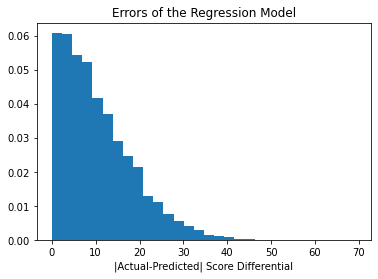

Average Mean Square Error: 178
Percentage of Predictions Within 1 Point: 5%
Percentage of Predictions Within 5 Points: 29%
Percentage of Predictions Within 10 Points: 55%
Percentage of Predictions Within 20 Points: 86%


In [23]:
score_diff_model = KNeighborsRegressor()
regressor(gameData, diff_feat_cols, score_diff, score_diff_model)

Using a k-nearest neighbors regression tool, the model is actually pretty accurate in determining the score differential of the game. Almost half the time the model predicts a score differential within five points of the actual one, and with ten points more than three-quarters of the time. 

<h2>The Next Stage: Using ELO to Predict NBA Games</h2>

While making the models above was fun an all, we wanted to explore a team-rating sytem, called ELO, that we thought was really cool and unique, and use that to see if it could potentially improve our models. Now what is ELO?

ELO was orignially invented as a new way to rate chess-players and compare their skills levels. But ELO is not unique to chess and can be used on any zero-sum game, such as basketball. The way ELO works is that the difference in ELO rating between two players is a prediction of the probability that each player will win. For example, if Player 1 is rated at 1570, and Player 2 is rated at 1700, then Player 2 is considered to be the better player before the game and is expected to win a certain probability above 50% which one can calculate. However, after every game, the players' ELO rating gets updated based on the results of the game. For example, if Player 1 is rated at 1570, and Player 2 is rated at 1700 but Player 1 wins, despite being rated lower, then his rating will go up and Player 2's rating will go down by the same amount. However, the amount by which each player's ratings will update is dependent on what we expect to happen. If a player with a much higher rating wins, that is what we expected to happen, and so the ratings won't change my that much. But on the other hand, if a player with a much lower rating pulls off the upset and wins, there will a lot of points transferred. 
Although we could go into more detail, we'll just explain the basic principle of ELO. If you want to learn more about ELO and its uses, check out this wikipedia page which outlines a lot of interesting history and goes into more mathematical details: https://en.wikipedia.org/wiki/Elo_rating_system.

Next, we will be looking at NBA teams ELO rating as a way to predict NBA games and point spreads. Luckily, 538 has generated for all NBA teams until 2015 so there is a lot to work with. (Check out this website for more insight into how 538 calculates their ELO ratings for NBA teams: https://fivethirtyeight.com/features/how-we-calculate-nba-elo-ratings/)



<h2>First Step: Get The ELO data:</h2>

In [24]:
EloData = pd.read_csv("./data/nbaallelo.csv")

In [25]:
# # Filtering the data to only include games from 2007 and onward, 
# because that matches up with the data that our other models were trained with,
# and we want to be able to easily compare our models.
# EloData = EloData[EloData["year_id"]>=1968]
# EloData.head()

<h3>Explanation of the data</h3>

Each game played in the NBA is represented twice in our dataset, as two rows. One from the home team's perspective and one from the away team's perspective. We don't want to double count games, so we are going to remove all games from the away team's perspective so that each row represents a unique game.

In [26]:
EloData = EloData[EloData["_iscopy"]==0]

<h5>Looking at the columns of our dataset:

In [27]:
EloData.columns

Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
       'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
       'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
       'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes'],
      dtype='object')

Now each row represents a unique game. There are a couple of key columns that we will look at for our ELO-based models. The main two are elo_i and  opp_elo_i. These represent the ELO rating of the home team and the away team before the game is played, respectivly. And, of course, forecast is the probability that the home team will win based on the ELO of the two teams and game_result is whether or not the home team won this game. 

Below I am creating a new column in my dataset called EloPrediction, which converts the forecast column, which is a probability,
to a binary column with just W and L. The way it works is if the forecast column is >= 0.5, I predict a win for the home team, if it's below,
I will predict a loss.

In [28]:
for index, row in EloData.iterrows():
    pred = 'W' if row['forecast'] >= 0.5 else 'L';
    correct = row["game_result"] == pred;
    EloData.at[index, 'EloPrediction'] = pred

In [29]:
# Displaying the new column we just created.
EloData[["game_result", "EloPrediction"]].head()

,game_result,EloPrediction
0,L,W
2,W,W
4,L,W
7,W,W
9,W,W


In [30]:
# A function that takes in a dataframe, potentially with different filters, 
# and returns the percent correct according to the ELO Model.
def accuracy(df=EloData, field="EloPrediction"):
    return 100*len(df[df["game_result"] == df[field]])/len(df)

Let's take an initial look at the accuracy of our model across all the game data we have:

In [31]:
def round_1(x, to=1):
    return round(x,to)

In [32]:
print(accuracy(EloData))

68.09538135123582


67.3%! Not bad at all. Now let's do some more exploratory analysis on our ELO Model.

<h2> Exploratory ELO Analysis

<h3> Accuracy of ELO Across Time </h3>

In [33]:
def accuracyForYear(year,df=EloData, field="EloPrediction"):
    return accuracy(df[df["year_id"]==year],field)

In [34]:
print(accuracyForYear(2008))

68.69300911854103


In [35]:
def graphAccuracyAcrossRange(start, end, df=EloData, field="EloPrediction", title="Accuracy Across Time"):
    years = [i for i in range(start,end)]
    accuracyAcrossYears = [accuracyForYear(i,df,field) for i in range(start, end)]
    colors = ['blue', 'red', 'green'];
    fig, ax = plt.subplots();
    ax.set_title(title)
    ax.set_xlabel("Time");
    ax.set_ylabel("Accuracy");
    ax.scatter(x=years,y=accuracyAcrossYears)

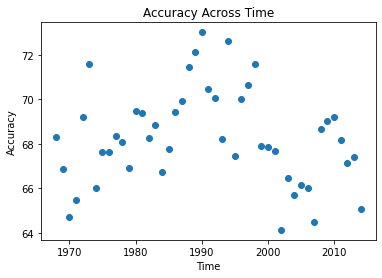

In [36]:
graphAccuracyAcrossRange(1968,2015)

As you can see, the accuracy does not vary too wildly across years (It is always withn the 65%-73%), but there is definetely some variation to look at here. The graph seems to show a rise in accuracy from 1960 which peaks around 1990, and then decreases from there. The reason for this might be the variation in home-court advantage over the years. The ELO model gives a bump to the ELO of the team which has home court advantage. However, this bump is constant and does not vary by year. However, it is very possible that the value of home-court advantage as gone up and down over time. The years where ELO predicts higher accuracy could be because the home-court advantage bump is more aligned with the actual home-court advantage for that year. While, years where ELO is less accurate could be years when the ELO home court advantage bump is either too high or too low for the current year. 

<h3> Accuracy of ELO by section of the season </h3>

First, I'll clarify what I mean by section of the season. Section of the season is meant to quantify what stage of a season a particular game is in. For example, a game might be in beginning stages of a season, on might in the more middleish portion of the season, or it might be at the end portion of the season. In this section, I create a column which represents this and then see if the ELO model is more accurate depending on the stage of the season. Let's dive in.

In [37]:
# Breaking up the season into 3 bins, with 1 being the first chunk of the season 
# and 3 being the last chunk.
EloData['sectionOfSeason'] = pd.cut(EloData.seasongame,3, labels=["1","2", "3"])

In [38]:
# This function is used to compare the accuracy of the ELO model without a specific portion of the season.
# I will use it to compare the accuracy when, for example, the beginning portion of seasons are taken out of account.
# Then I will graph the accuracy when the section is taken out compared to the general case when all the data is used.
def graphAccuracyWithoutSection(start, end, section="1", title="", should_print_flag=False):
    years = [i for i in range(start,end)]
    EloDataWithoutSection = EloData[EloData["sectionOfSeason"] != section]
    dfs = [EloData, EloDataWithoutSection]
    
    accuracyAcrossYears = [[accuracyForYear(i,df) for i in range(start, end)] for df in dfs]
    
    colors = ['blue', 'red', 'green'];
    fig, ax = plt.subplots();
    ax.set_title("Accuracy Across Time")
    ax.set_xlabel("Time");
    ax.set_ylabel("Accuracy");
    ax.set_title(title)
    for i in range(0, len(accuracyAcrossYears)):
        ax.scatter(x=years,y=accuracyAcrossYears[i], c=colors[i])
    plt.show()
    if should_print_flag:
        print("Below, I performed a t-test to see how significant the change in accuracy was when I took a specific section out compared to \nwhen all sections are included. I will talk more about the results of these t tests after the graphs.")
    print(st.ttest_rel(accuracyAcrossYears[0], accuracyAcrossYears[1]))

Below I show graphs that show the accuracy of the ELO Model when one section of the the season is removed compared to when the entire dataset is present. We were curious if the ELO model was less accurate on certain sections of the season and these graphs confirm that there might be some interesting differences in accuracy between the portions of the season.

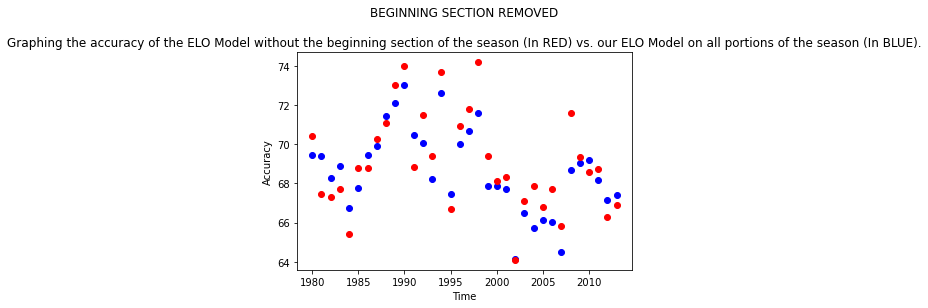

Below, I performed a t-test to see how significant the change in accuracy was when I took a specific section out compared to 
when all sections are included. I will talk more about the results of these t tests after the graphs.
Ttest_relResult(statistic=-2.084302568570835, pvalue=0.044950629352861246)


In [39]:
title = "BEGINNING SECTION REMOVED\n\nGraphing the accuracy of the ELO Model without the beginning section of the season (In RED) vs. our ELO Model on all portions of the season (In BLUE)."
graphAccuracyWithoutSection(1980, 2014, section="1", title=title, should_print_flag=True)



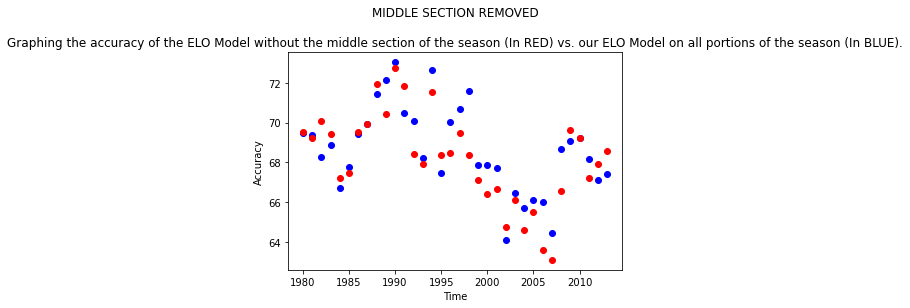

Ttest_relResult(statistic=2.2186920049854857, pvalue=0.033498404869079144)


In [40]:
graphAccuracyWithoutSection(1980, 2014, section="2", title="MIDDLE SECTION REMOVED\n\nGraphing the accuracy of the ELO Model without the middle section of the season (In RED) vs. our ELO Model on all portions of the season (In BLUE).")



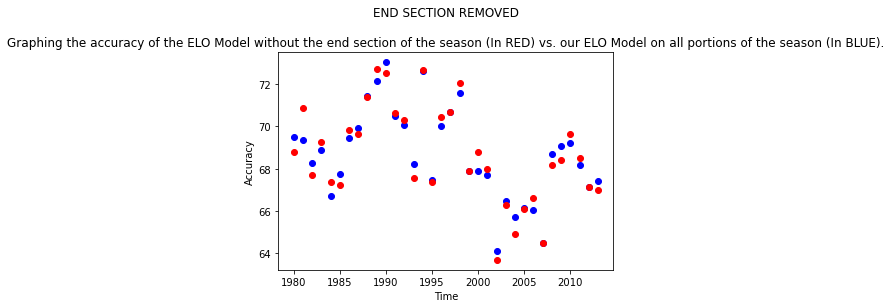

Ttest_relResult(statistic=-0.2656913593615828, pvalue=0.7921298008589254)


In [41]:
graphAccuracyWithoutSection(1980, 2014, section="3", title="END SECTION REMOVED\n\nGraphing the accuracy of the ELO Model without the end section of the season (In RED) vs. our ELO Model on all portions of the season (In BLUE).")



<h3>Analysis and Insights: 

From the graphs, and the t-tests suport these observations, there are two important points to make: One is that the beginning section of the season is the portion of the season where ELO does worst on. We can see that from the graph, and how the red points, which represent the data without the first section of the season, are usually higher (in accuracy) than the blue points, which represents all sections. This observation is backed up by the t-test, which gives a p-value of 0.04495, which is statiscillay signifciant using a standard threshold of 0.05. The second point is that the middle section of the season is the section where the ELO model performs best on. This can be seen by the red points, which represent the data without the middle section of the season, being lower (in accuracy) than the blue points, which represents all sections. Once again, our t-test supports this with a p-value of ~0.0335 which is significant using the standard threshold of 0.05. However, when the end section of the season is removed, there isn't as much insight. The different color points don't seem to be consisnstently below or above in accuracy. Although the red points, which represent when the end section of the season is removed, are on average higher in accuracy but not to such a significant extent, and the t test also doesn't find a significant p-value here.

<h2> Next Stage: Looking at Point Spreads </h2>

For the last couple sections, we have been analyzing ELO from the perspective of predicting wins and losses. But we can do more with ELO than just that; we can also predict point spreads for games. (point spread is the difference in final score for a particular game) From 538's <a href="https://fivethirtyeight.com/features/how-we-calculate-nba-elo-ratings/"> article</a> on ELO, The formula is to simply add the home-court advantage to the home team, and then divide the difference in ELO between the two teams by 28. 

So now, let's go ahead and add the point spread as a column in our data frame. We will add our predicted point spread and then the actual point spread.

In [42]:
# Going through each game and adding the point spread as a column
for index, row in EloData.iterrows():
    actualPointSpread = row["pts"] - row["opp_pts"]
    pointSpread538 = (row["elo_i"] + 100 - row["opp_elo_i"]) / 28
    # pointSpread = (row["elo_home_before"] + row["homeCourtELO"] - row["elo_away_before"]) / 28
    EloData.at[index, 'pointSpread538Elo'] = pointSpread538
    # EloData.at[index, 'pointSpreadOurELO'] = pointSpread
    EloData.at[index, 'actualPointSpread'] = actualPointSpread

There, now we have point spreads! 

Now let's define some functions that will help us see how 538's ELO model is doing in predicting point spreads.

In [43]:
# Function that returns the residual for the point spread for each game in a dataframe in an array.
def pointSpreadResiduals(df=EloData, field="pointSpread538Elo"):
    error = [];
    for idx, row in df.iterrows():
        error.append(row[field] - row["actualPointSpread"]);
    return error

In [44]:
# Function that gets the mean squared error of our point spread prediction for a dataframe
def pointSpreadMSE(df=EloData, field="pointSpread538Elo"):
    error = 0;
    if len(df) == 0:
        return None;
    for idx, row in df.iterrows():
        error += (row[field] - row["actualPointSpread"])**2;
    return error / len(df)

In [45]:
# Function that finds the mean squared error of our point spread prediction for a a given year
def pointSpreadMSEForYear(year, df=EloData, field="pointSpread538Elo"):
    return pointSpreadMSE(df[df["year_id"]==year],field=field)

In [46]:
# Function that graphs the point spread MSE for a given year range
def graphPointSpreadAcrossRange(start, end, df=EloData, fields=["pointSpread538Elo"], title="MSE Across years for point spread with 538 ELO model"):
    years = [i for i in range(start,end)]
    pointSpreadAcrossYears = [[pointSpreadMSEForYear(i, df,field) for i in range(start, end)] for field in fields]
    colors = ['blue', 'red', 'green'];
    fig, ax = plt.subplots();
    ax.set_title(title)
    ax.set_xlabel("Time");
    ax.set_ylabel("Absolute Error of Point Spread");
    for i in range(0, len(pointSpreadAcrossYears)):
        ax.scatter(x=years,y=pointSpreadAcrossYears[i], c=colors[i])
    plt.show()

Let's see what the Mean Squared Error is for the ELO model across all games:

In [47]:
pointSpreadMSE()

137.12658385489016

Now let's look at how the MSE varies across years

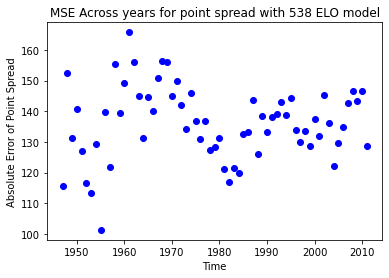

In [48]:
graphPointSpreadAcrossRange(1947,2012, fields=["pointSpread538Elo"])

So it looks like the MSE definetely varies some from year to year,but mostly stays in the same general range. Let's look at the distribution of the residuals of our models across years...using a violin plot!

In [49]:
EloData

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,EloPrediction,sectionOfSeason,pointSpread538Elo,actualPointSpread
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,1300.0000,1306.7233,H,L,0.640065,NaN,W,1,3.571429,-2.0
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,1306.7233,1297.0712,H,W,0.631101,NaN,W,1,3.331311,16.0
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,1300.0000,1320.3811,H,L,0.640065,NaN,W,1,3.571429,-17.0
7,4,194611020PRO,NBA,0,1947,11/2/1946,1,0,PRO,Steamrollers,...,1300.0000,1294.8458,H,W,0.640065,NaN,W,1,3.571429,6.0
9,5,194611020STB,NBA,0,1947,11/2/1946,1,0,STB,Bombers,...,1300.0000,1295.3092,H,W,0.640065,NaN,W,1,3.571429,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126305,63153,201506070GSW,NBA,0,2015,6/7/2015,99,1,GSW,Warriors,...,1708.1705,1716.8708,H,L,0.757674,NaN,W,3,7.072607,-2.0
126307,63154,201506090CLE,NBA,0,2015,6/9/2015,99,1,CLE,Cavaliers,...,1797.5032,1790.9591,H,W,0.527843,NaN,W,3,0.691700,5.0
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,...,1790.9591,1809.9791,H,L,0.546572,NaN,W,3,1.159136,-21.0
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,...,1704.3949,1700.7391,H,W,0.765565,NaN,W,3,7.342293,13.0


In [50]:
# First we create a list of lists seperated by year
def groupDataByYear(df=EloData, start=1948, end=2015):
    allYears = [year for year in range(start, end+1,4)]
    groupedData = [];
    dfsByYear = [df[df["year_id"]==year] for year in allYears]
    for df in dfsByYear:
        groupedData.append(pointSpreadResiduals(df));
    return (allYears,groupedData)

In [51]:
residualsByYear = groupDataByYear()

In [52]:
def displayViolinPlot(dataByField, fields, xLabel, yLabel, title):
    fig, ax = plt.subplots()
    ax.violinplot(dataByField,fields,widths=4,showmeans=True)
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    ax.set_title(title)
    fig.set_figwidth(15)
    plt.show()

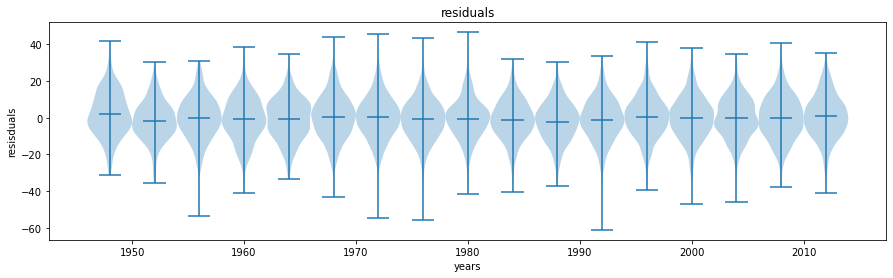

In [53]:
displayViolinPlot(residualsByYear[1], residualsByYear[0], "years", "resisduals", "residuals")

Okay, so there doesn't seem to be much skew to one side or the other, indicating that our model is guess wrong in both directions a roughly equal amount. Let's look at one more thing: Residuals for different sections of the season. (Sections meaning the same thing from what we discussed earlier. e.g. the begginning of the season is one section of the season.)

In [54]:
# Function to create a graph that shows each section of the season as a different color and displays the MSE across years.
def graphMSEBySection(start, end, title="BLUE=Beginning Section; RED=Middle Section; GREEN=End Section \nMSE of ELO model for point spreads across years"):
    years = [i for i in range(start,end)]
    sections = ["1", "2", "3"];
    # creating 3 datasets, one for each section.
    EloDataForSections = [EloData[EloData["sectionOfSeason"] == section] for section in sections]
    
    # calculating the MSE for each year, for each section seperately.
    residualsAcrossYears = [[pointSpreadMSEForYear(i,df) for i in range(start, end)] for df in EloDataForSections]
    
    colors = ['blue', 'red', 'green'];
    fig, ax = plt.subplots();
    ax.set_xlabel("Time");
    ax.set_ylabel("MSE");
    ax.set_title(title)
    for i in range(0, len(residualsAcrossYears)):
        ax.scatter(x=years,y=residualsAcrossYears[i], c=colors[i])
    plt.show()

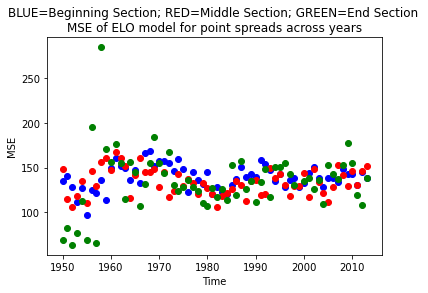

In [55]:
graphMSEBySection(1950,2014)

It doesn't look like there is the same differences across sections that we found when looking at ELO's accuracy on just wins and losses. One section does not seem to be consistently better than the others. Let's look at a bar graph displaying the error for each section to confirm.

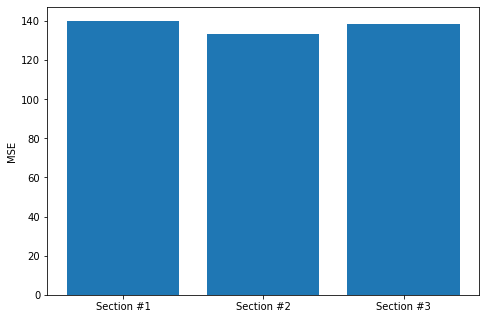


MSE For section #1:140.23300283961322
MSE For section #2:133.49505817367736
MSE For section #3:138.307263713281


In [56]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sections = ['Section #1', 'Section #2', 'Section #3']
MSEs = [pointSpreadMSE(EloData[EloData["sectionOfSeason"]==str(i)]) for i in range(1,4)]
ax.bar(sections,MSEs)
ax.set_ylabel("MSE");
plt.show()
print("\nMSE For section #1:" + str(MSEs[0]))
print("MSE For section #2:" + str(MSEs[1]))
print("MSE For section #3:" + str(MSEs[2]))

The bar graph tells a little bit of a different story. It seem like Section 2 is a touch better than section 1 and 2 with the MSE being 133.49 while section 3 is 138.3 and section 1 is 140.23. So there is a similar effect going on to what we saw previously where the ELO model was just predicting wins and losses and it performed best on section 2 and worse on section 1 and 3. Let's run some t-tests to test this hypothesis.

In [57]:
years = [i for i in range(1948,2014) if i != 1999]
sections = ["1", "2", "3"];
# creating 3 datasets, one for each section.
EloDataForSections = [EloData[EloData["sectionOfSeason"] == section] for section in sections]

# calculating the MSE for each year, for each section seperately.
residualsAcrossYears = [[pointSpreadMSEForYear(i,df) for i in range(1950, 2014) if i != 1999] for df in EloDataForSections]
residualsAcrossYears[2] = [el for el in residualsAcrossYears[2] if el != None]

T Test between sections 1 and 2:

In [58]:
print(st.ttest_rel(residualsAcrossYears[0], residualsAcrossYears[1]))

Ttest_relResult(statistic=2.5726572016849842, pvalue=0.01250021462635613)


T Test between sections 1 and 3:

In [59]:
print(st.ttest_rel(residualsAcrossYears[0], residualsAcrossYears[2]))

Ttest_relResult(statistic=1.1902449727941031, pvalue=0.23848770140918774)


T Test between sections 2 and 3:

In [60]:
print(st.ttest_rel(residualsAcrossYears[1], residualsAcrossYears[2]))

Ttest_relResult(statistic=-0.12731798106421152, pvalue=0.8991007678744161)


From the T-tests above, we see that the only statistically significant difference (with a threshold of 0.05) was between Section 1 and Section 2. Besides that, the other comparisons are not very significant. This shows that the claim that the ELO Model is better at predicting section 2 of the season compared to section 1 is strong. 

In [61]:
# def groupDataBySectionOfSeason(df=EloData):
#     sections = [1,2,3]
#     groupedData = [];
#     dfsByPlayoff = [df[df["sectionOfSeason"]==str(i)] for i in sections]
#     for df in dfsByPlayoff:
#         groupedData.append(pointSpreadResiduals(df));
#     return (sections, groupedData)

In [62]:
# residualsBySection = groupDataBySectionOfSeason()

In [63]:
# displayViolinPlot(residualsBySection[1], residualsBySection[0], "years", "resisduals", "residuals")

In [64]:
# def set_axis_style(ax, labels):
#     ax.xaxis.set_tick_params(direction='out')
#     ax.xaxis.set_ticks_position('bottom')
#     ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
#     ax.set_xlim(0.25, len(labels) + 0.75)
#     # ax.set_xlabel('Model residuals grouped by continent continent')
#     ax.set_ylabel('Model residuals')
#     ax.set_title('Model residuals grouped by playoff vs. non-playoff')

In [65]:
# fig, ax = plt.subplots()
# ax.violinplot(residualsByPlayoff[1])
# set_axis_style(ax, residualsByPlayoff[0])
# plt.show()

<h2>Next Steps: Modifying the ELO algorithm</h2>

Now that we have done some analysis on 538's ELO Model, it is time to take ELO into our own hands! In this section, we will recreate 538's ELO algorithm to the best degree that we can, and then tweek it to find new insights and potentially build a more accurate model.

I was lucky enough to find a great article (which links to some python code) which recreates 538's ELO Model. There seems to be some difference between the constants in the article,(that we will use) and the constants that 538 uses. If you are interested: Here is a link to the article: https://www.ergosum.co/nate-silvers-nba-elo-algorithm/?fbclid=IwAR17CIiR8VywvSAKM97KRaUF8kqH89duReYsp0wY191WazCY0vv4rEo3Cgc.

I modified the originial code in order to get the ELO after each game and place it in a pandas dataframe while the originial code only saved the final ELO of each team. (Link to code: https://github.com/rogerfitz/tutorials/blob/master/Nate%20Silver%20ELO/NBA%20ELO%20Replicate.ipynb)


<h4> Defining some key terms in ELO</h4>
In order to make the ELO creation code more readible, I think its important to first clarify a few constants that ELO uses to update its ratings. Below is a screen shot from the article I found which does a good job explaining the terms. Note that Nate refers to Nate Silver, the founder of 538 and also that MOV refers to the winner's score minus the loser's score.
<img src="eloExplained.png"></img>


It's okay if you don't totally understand the math formulas above, as long as its clear that the goal is to recreate the ELO rating from 538.

In [66]:
# Creating the SEASON column
EloData['SEASON']=EloData['year_id'].apply(lambda x: "%s-%s"%(x-1,x))

After reimporting the data, below is key code to recreate ELO based on 538:

In [67]:
# This function takes in the difference, home_team_points - away_team_points, 
# and the elo difference between these two teams and uses it to create the 
# K value which determines how much to update each team's ratings after games.
def silverK(MOV, elo_diff):
    K_0=20
    if MOV>0:
        multiplier=(MOV+3)**(0.8)/(7.5+0.006*(elo_diff))
    else:
        multiplier=(-MOV+3)**(0.8)/(7.5+0.006*(-elo_diff))
    return K_0*multiplier,K_0*multiplier

# This function takes in the home team score and away team score and returns (1,0) 
# if home wins, (0,1) if away wins and (0.5,0.5) for a tie
def silverS(home_score, away_score):
    S_home,S_away=0,0
    if home_score>away_score:
        S_home=1
    elif away_score>home_score:
        S_away=1
    else:
        S_home,S_away=.5,.5
    return S_home,S_away


# This function takes in the home and away score, and their elo ratings, and uses it 
# to return the update to each team's ratings based on their current ratings and 
# the home court advantage.
def silver_elo_update(home_score, away_score, home_rating, away_rating, HOME_AD=100):
    home_rating+=HOME_AD
    E_home = elo_prediction(home_rating,away_rating, HOME_AD)
    E_away=1-E_home
    elo_diff=home_rating-away_rating
    MOV=home_score-away_score
    
    S_home,S_away = silverS(home_score,away_score)
    if S_home>0:
        K_home,K_away =  silverK(MOV,elo_diff)
    else:
        K_home,K_away =  silverK(MOV,elo_diff)
        
    return K_home*(S_home-E_home),K_away*(S_away-E_away)

# This function uses the team's ratings to return the expected chance that the home team will win. 
# This follows the same process as is defined in the screen shot above.
def elo_prediction(home_rating,away_rating, HOME_AD=100):
    home_rating+=HOME_AD;
    E_home = 1./(1 + 10 ** ((away_rating - home_rating) / (400.)))
    return E_home


# Takes in a the team's ratings and produces a prediction of the spread (difference in points between the two teams).
def score_prediction(home_rating,away_rating):
    return (home_rating-away_rating)/28.

# This function takes in a franchise id and the gameorder and returns the elo rating from the originial 538 rating table.
def elo_lookup(fran_id,gameorder):
    return EloData[(EloData['fran_id']==fran_id)&(EloData['gameorder']>=gameorder)]['elo_i'].iloc[0]


class HeadToHeadModel(object):
    def __init__(self, events,data, update_function, prediction_function=None):
        self.update_function=update_function
        self.events=events
        self.data=data
        self.ratings={}
        self.prediction_function = prediction_function
        self.predictions = []
        self.curr_season=defaultdict(lambda: EloData.iloc[0]["year_id"])

# This function loops through all the games in the dataframe and updates the ELO ratings after each game.
    def train(self):
        for idx, event in self.data.iterrows():
            new_year=event['year_id']
            label_i=event['fran_id']
            label_j=event['opp_fran']
            
            # if the home team has not been seen by our loop yet
            if self.ratings.get(label_i,False)==False:
                self.ratings[label_i]=elo_lookup(label_i,event['gameorder'])
            
            # if the away team has not been seen by our loop yet
            if self.ratings.get(label_j,False)==False:
                self.ratings[label_j]=elo_lookup(label_j,event['gameorder'])
                
            # if the home team has not has their rating updated for a new season.
            # Every season, every team's ratings revert to some degree back to the mean rating.
            if self.curr_season[label_i]!=new_year:
                self.curr_season[label_i]=new_year
                self.ratings[label_i]=self.ratings[label_i]*.75+1505.*.25
            elif self.curr_season[label_j]!=new_year:
                self.curr_season[label_j]=new_year
                self.ratings[label_j]=self.ratings[label_j]*.75+1505.*.25
            
            # Inserting the ELO ratings before the game
            self.data.at[idx, 'elo_home_before'] = self.ratings[label_i];
            self.data.at[idx, 'elo_away_before'] = self.ratings[label_j];
            self.data.at[idx, 'new_forecast'] = elo_prediction(self.ratings[label_i], self.ratings[label_j])
            update=self.update_function(event['pts'],event['opp_pts'], self.ratings[label_i], self.ratings[label_j])
            # Inserting the ELO ratings after the game and we have updated the ratings
            self.ratings[label_i]+=update[0]
            self.ratings[label_j]+=update[1]
            self.data.at[idx, 'elo_home_after'] = self.ratings[label_i];
            self.data.at[idx, 'elo_away_after'] = self.ratings[label_j];

In [68]:
# Creating the model
m=HeadToHeadModel(list(EloData.iterrows()), EloData.copy(), silver_elo_update, elo_prediction)

In [69]:
# Training the Model! (Meaning calculating ELO ratings for each game in our database)
m.train()

In [70]:
# setting games equal to our new dataframe with our own elo ratings.
EloData = m.data

<h4> Checking in on where we are </h4>
We just ran a lot of code, and its fine if you didn't understand some of the technical parts of creating ELO. The important part is that now, we have successfully created our own ELO metric, and have it saved in our dataframe. Now it's time to see how well we did in replicating the ELO model and how its accuracy compares the originial.

Below I am creating a new column in my dataset called NewEloPrediction, which converts the forecast column, which is a probability, to a binary column with just W and L. (Works the same way as the originial EloPrediction column)

In [71]:
def calculateNewEloPreds():
    for index, row in EloData.iterrows():
        pred = 'W' if row['new_forecast'] >= 0.5 else 'L';
        correct = row["game_result"] == pred;
        EloData.at[index, 'NewEloPrediction'] = pred

In [72]:
print("Accuracy of originial 538 ELO Model:" + str(round(accuracy(EloData), 1)) + "%")

Accuracy of originial 538 ELO Model:68.1%


In [73]:
calculateNewEloPreds()
print("Accuracy of our ELO Model:" + str(round(accuracy(EloData, "NewEloPrediction"),1)) + "%")

Accuracy of our ELO Model:68.1%


In [74]:
EloData.columns

Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
       'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
       'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
       'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes',
       'EloPrediction', 'sectionOfSeason', 'pointSpread538Elo',
       'actualPointSpread', 'SEASON', 'elo_home_before', 'elo_away_before',
       'new_forecast', 'elo_home_after', 'elo_away_after', 'NewEloPrediction'],
      dtype='object')

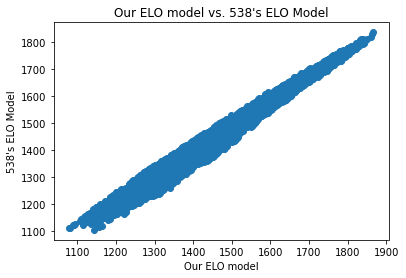

In [75]:
fig, ax = plt.subplots();
ax.set_title("Our ELO model vs. 538's ELO Model")
ax.set_xlabel("Our ELO model");
ax.set_ylabel("538's ELO Model");
ax.scatter(x=EloData["elo_home_before"],y=EloData["elo_i"])

There does seem to some variation between our model and 538's, which is probably due to the fact that it was diificult to find the exact constants that they used in making their ELO, so we had to guess and use outside sources. But clearly, the two models are very similar. (They have the exact same accuracy to the first decimal place.) We decided that instead of spending hours on trying to figure out the exact constants that 538 uses and making our model replicate it exactly, we are happy with the similarity that we achieved and will instead move forward doing analysis with our ELO model.

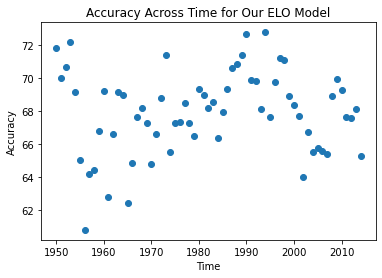

In [76]:
graphAccuracyAcrossRange(1950,2015, df=EloData, field="NewEloPrediction", title="Accuracy Across Time for Our ELO Model")

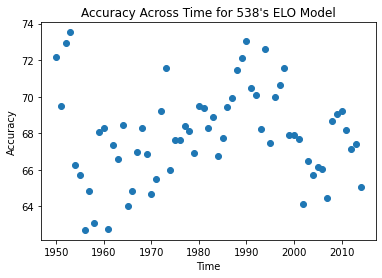

In [77]:
graphAccuracyAcrossRange(1950,2015, df=EloData, title="Accuracy Across Time for 538's ELO Model")

Above we can see the accuracy across time of our ELO Model and 538's ELO Model. As we could expect, the overall trend of the data is the same, with some variation because our ELO isn't the exact same function as 538's.

In [78]:
# EloData[-100:-50][["elo_home_before", "elo_i","elo_away_before", "opp_elo_i", "NewEloPrediction", "EloPrediction", "homeCourtELO", "game_result","forecast","new_forecast","pointSpread538Elo","pointSpreadOurELO","actualPointSpread" ]]



In [79]:
# EloData

<h3>Changing the ELO Model: Dynamic Home Court Advantage</h3>

Now it is time to utilize the whole reason why we went through all the work of creating our own ELO metric: so we can mess with it. The orignial 538 ELO model assumes a constant advantage to the home team and always gives it 100 ELO points to account for that. However, has home court advntage stayed the same throughout history? Let's take a look.

In [80]:
# Function that calculates the percentage of games that the home team has won over a dataset.
def home_team_wins_percent(df=EloData):
    return 100*len(df[df["game_result"] == "W"])/len(df)

In [81]:
# Function that calculates the percentage of games that the home team has won over a given year.
def home_team_wins_percentForYear(year,df=EloData, field="EloPrediction"):
    return home_team_wins_percent(df[df["year_id"]==year])

In [82]:
def graphHomeCourtWinsAcrossRange(start, end, df=EloData):
    years = [i for i in range(start,end)]
    homeCourtAcrossYears = [home_team_wins_percentForYear(i,df) for i in range(start, end)]
    fig, ax = plt.subplots();
    ax.set_title("Percent of Games Home Team Wins Across Time")
    ax.set_xlabel("Time");
    ax.set_ylabel("% of games home team wins");
    ax.scatter(x=years,y=homeCourtAcrossYears)

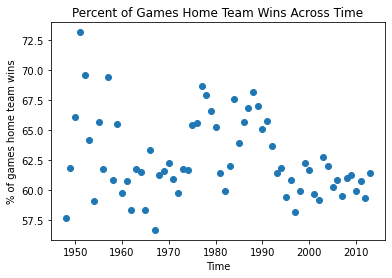

In [83]:
graphHomeCourtWinsAcrossRange(1948, 2014, df=EloData)

It seems from this plot that home court advantage it definetely not constant over the years. It goes up and down with no obvious pattern. To account for this, We will change our ELO model to have a dynamic home-court advantage, instead of being the constant 100 ELO points. The way we implement the dynamic nature will be through calculating a running percent of the last 1300 games where the home team won. Then, we will view that percentage as a probability and translate that probablility to ELO points using the inverse of the function that gives us a probablility from an ELO difference. Note: For the first 1300 games played, we will used a constant ELO of 85 because there hasn't been enough games to calculate any useful information.

In [84]:
def calculateRunningPercentHomeTeamWins(df):
    startWindowIndex = 1;
    runningHomeTeamWinCount = 0;
    
    for index, row in df.iterrows():
        if row["gameorder"]-startWindowIndex < 1300:
            runningHomeTeamWinCount = 1+runningHomeTeamWinCount if row["game_result"]=="W" else runningHomeTeamWinCount;
            df.at[index, 'homeTeamWinPer'] = runningHomeTeamWinCount / (row["gameorder"]+1 - startWindowIndex);
        else:
            runningHomeTeamWinCount = runningHomeTeamWinCount - 1 if df.iloc[startWindowIndex]["game_result"]=="W" else runningHomeTeamWinCount;
            runningHomeTeamWinCount = 1 + runningHomeTeamWinCount if row["game_result"]=="W" else runningHomeTeamWinCount;
            startWindowIndex+=1;
            df.at[index, 'homeTeamWinPer'] = runningHomeTeamWinCount / (row["gameorder"] + 1 - startWindowIndex);

In [85]:
calculateRunningPercentHomeTeamWins(EloData)

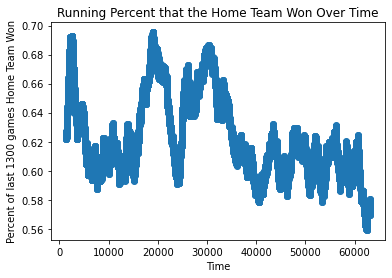

In [86]:
fig, ax = plt.subplots();
ax.set_title("Running Percent that the Home Team Won Over Time")
ax.set_xlabel("Time");
ax.set_ylabel("Percent of last 1300 games Home Team Won");
ax.scatter(x=EloData[1300:]["gameorder"],y=EloData[1300:]["homeTeamWinPer"])

Now I use the running average to calculate the home court advantage in terms of ELO points:

In [87]:
def calculateELOfromRunningAverage(df):
    for index, row in df.iterrows():
        if row["gameorder"] < 1300:
            df.at[index, 'homeCourtELO'] = 85;
        else:
            homeCourtElo = -1*(400 * (math.log10( (1 / row["homeTeamWinPer"]) - 1 )))
            df.at[index, 'homeCourtELO'] = homeCourtElo;

In [88]:
calculateELOfromRunningAverage(EloData)

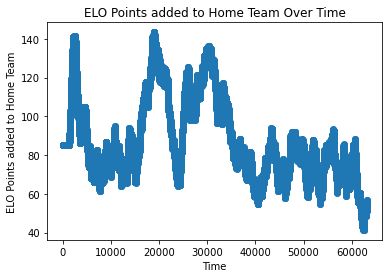

In [89]:
fig, ax = plt.subplots();
ax.set_title("ELO Points added to Home Team Over Time")
ax.set_xlabel("Time");
ax.set_ylabel("ELO Points added to Home Team");
ax.scatter(x=EloData["gameorder"],y=EloData["homeCourtELO"])

Rewriting our model to account for this change:

In [90]:
class HeadToHeadModel(object):
    def __init__(self, events,data, update_function, prediction_function=None):
        self.update_function=update_function
        self.events=events
        self.data=data
        self.ratings={}
        self.prediction_function = prediction_function
        self.predictions = []
        self.curr_season=defaultdict(lambda: EloData.iloc[0]["year_id"])

# This function loops through all the games in the dataframe and updates the ELO ratings after each game.
    def train(self):
        for idx, event in self.data.iterrows():
            new_year=event['year_id']
            label_i=event['fran_id']
            label_j=event['opp_fran']
            
            # if the home team has not been seen by our loop yet
            if self.ratings.get(label_i,False)==False:
                self.ratings[label_i]=elo_lookup(label_i,event['gameorder'])
            
            # if the away team has not been seen by our loop yet
            if self.ratings.get(label_j,False)==False:
                self.ratings[label_j]=elo_lookup(label_j,event['gameorder'])
                
            # if the home team has not has their rating updated for a new season.
            # Every season, every team's ratings revert to some degree back to the mean rating.
            if self.curr_season[label_i]!=new_year:
                self.curr_season[label_i]=new_year
                self.ratings[label_i]=self.ratings[label_i]*.75+1505.*.25
            elif self.curr_season[label_j]!=new_year:
                self.curr_season[label_j]=new_year
                self.ratings[label_j]=self.ratings[label_j]*.75+1505.*.25
            
            # Inserting the ELO ratings before the game
            self.data.at[idx, 'elo_home_before'] = self.ratings[label_i];
            self.data.at[idx, 'elo_away_before'] = self.ratings[label_j];
            self.data.at[idx, 'new_forecast'] = elo_prediction(self.ratings[label_i], self.ratings[label_j], event["homeCourtELO"])
            update=self.update_function(event['pts'],event['opp_pts'], self.ratings[label_i], self.ratings[label_j], event["homeCourtELO"])
            # Inserting the ELO ratings after the game and we have updated the ratings
            self.ratings[label_i]+=update[0]
            self.ratings[label_j]+=update[1]
            self.data.at[idx, 'elo_home_after'] = self.ratings[label_i];
            self.data.at[idx, 'elo_away_after'] = self.ratings[label_j];

In [91]:
# Creating the model
m=HeadToHeadModel(list(EloData.iterrows()), EloData.copy(), silver_elo_update, elo_prediction)

In [92]:
# Retraining the model! (Meaning calculating ELO ratings for each game in our database with our new ELO model)
m.train()

In [93]:
EloData = m.data

In [94]:
# Recalculating our ELO predictions
calculateNewEloPreds()

So now that we have gone through all this work and recalculated ELO using dynamic home court advantage, let's see if it actually improved anything:

In [95]:
print("Accuracy of our new ELO model:" + str(round_1(accuracy(EloData[EloData["year_id"]>197], "NewEloPrediction"))) + "%")

Accuracy of our new ELO model:68.3%


In [96]:
print("Accuracy of the 538 ELO model:" + str(round_1(accuracy(EloData[EloData["year_id"]>1965], "EloPrediction"))) + "%")

Accuracy of the 538 ELO model:68.2%


Our model improved!! Albeit only by 0.2%. Let's run a t-test on the accuracy of our new model and old model across the years to see if this change is statistically significant:

In [97]:
accuracyForYear(2010, df=EloData, field="NewEloPrediction")

69.35975609756098

In [98]:
accNewModel = [accuracyForYear(i, df=EloData, field="NewEloPrediction") for i in range(1970, 2014)]
acc538Model = [accuracyForYear(i, df=EloData, field="EloPrediction") for i in range(1970, 2014)]

In [99]:
print(st.ttest_rel(accNewModel, acc538Model))

Ttest_relResult(statistic=1.9300278984586543, pvalue=0.060216692072778896)


<h3>Final Step: Combining the ELO Model and The Earlier Ones</h3><br>
Now that we have seen that ELO is an effective tool to predict the outcome of NBA games, we will add this to our classification and regression models we created in the first step to see if we achieve more accurate predictions. We can accomplish this by merging the elo_home_before, elo_away_before, and homeCourtELO columns into our gameData dataframe by using the game_id we took from the ELO dataset in the first step of the project. 

In [100]:
# merging the ELO collumns from EloData onto the gameData using game_id
gameData = gameData.merge(EloData[['game_id', 'elo_home_before', 'elo_away_before']],
                          how='left', on='game_id')
gameData.sample(5)

,GAME_ID,G_home,W_PCT_home,HOME_RECORD_home,ROAD_RECORD_home,W_PCT_prev_home,HOME_RECORD_prev_home,ROAD_RECORD_prev_home,G_away,W_PCT_away,...,TEAM_ID_home,TEAM_ID_away,NICKNAME_home,game_id,date_game,fran_id,year_id,elo_home_before,elo_away_before,homeCourtELO
2902,20900444,29,0.414,0.466667,0.357143,0.232,0.268293,0.195122,28,0.821,...,1610612746,1610612738,Clippers,200912270LAC,2009-12-27,Clippers,2010.0,1365.310277,1709.297009,87.884798
7001,21201095,72,0.361,0.527778,0.194444,0.303,0.333333,0.272727,72,0.375,...,1610612764,1610612761,Wizards,201303310WAS,2013-03-31,Wizards,2013.0,1458.379919,1424.683156,81.083621
8716,21400351,22,0.227,0.250000,0.200000,0.488,0.585366,0.390244,23,0.304,...,1610612750,1610612747,Timberwolves,201412140MIN,2014-12-14,Timberwolves,2015.0,1392.966045,1400.376881,46.783637
4247,21000559,38,0.526,0.750000,0.363636,0.610,0.634146,0.585366,36,0.583,...,1610612757,1610612752,Trailblazers,201101110POR,2011-01-11,Trailblazers,2011.0,1556.868643,1529.435075,66.547551
2101,20800873,56,0.696,0.740741,0.655172,0.683,0.829268,0.536585,56,0.786,...,1610612759,1610612739,Spurs,200902270SAS,2009-02-27,Spurs,2009.0,1676.275045,1694.341618,82.212788


In [101]:
# adding the three elo attributes to the feature columns we had initially
winner_feat_cols = winner_feat_cols + ['elo_home_before', 'elo_away_before']
diff_feat_cols = diff_feat_cols + ['elo_home_before', 'elo_away_before']

In [104]:
print('Results for predicting the correct winner:\n')
print('Decision Tree Results: ')
classifier(gameData, winner_feat_cols, home_team_wins, DecisionTreeClassifier())
print('\nK-Nearest Neighbors Classifier Results: ')
classifier(gameData, winner_feat_cols, home_team_wins, KNeighborsClassifier())
print('\nRandom Forest Classifier Results: ')
classifier(gameData, winner_feat_cols, home_team_wins, RandomForestClassifier())

Results for predicting the correct winner:

Decision Tree Results: 
Accuracy: 58%
Precision: 65%
Recall: 64%

K-Nearest Neighbors Classifier Results: 
Accuracy: 63%
Precision: 68%
Recall: 72%

Random Forest Classifier Results: 
Accuracy: 66%
Precision: 69%
Recall: 76%


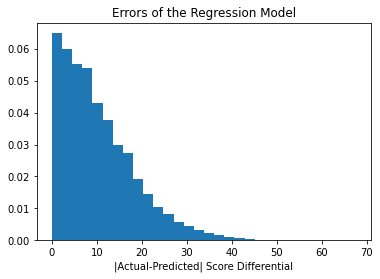

Average Mean Square Error: 172
Percentage of Predictions Within 1 Point: 5%
Percentage of Predictions Within 5 Points: 30%
Percentage of Predictions Within 10 Points: 56%
Percentage of Predictions Within 20 Points: 87%


In [105]:
score_diff_model = KNeighborsRegressor()
regressor(gameData, diff_feat_cols, score_diff, score_diff_model)